###EDA on Netflix Data

##Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

##Data Loading

In [2]:
#Clone Datasets from github
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 4.56 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
#Read titanic dataset
df = pd.read_csv("/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv")

##Basic Information

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 12)

In [6]:
#Information about features (Null count & object type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Total 7787 entries/rows. Missing values found for director, cast, country, date_added & rating. date_added column is of object type, should be converted to datetime object.

In [7]:
#Duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


##Data Cleaning & Transformation

Handling Missing values

In [9]:
#Replace nan with variable
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

#Replace null value with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

#Drop rows if few rows are missing
#df['date_added'].dropna(inplace=True)
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [10]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Formatting

In [11]:
#Using in-built to_datetime pandas function to convert date added in a proper format of year/month/date
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [12]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


Creating new features

In [13]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Checking data type after transformation

In [14]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


##Exploratory Data Analysis & Visualization

Q.1. What is the distribution of content type?

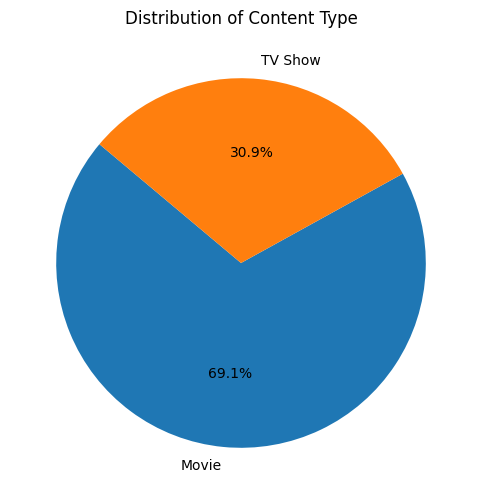

In [15]:
plt.figure(figsize=(8,6))
#sns.countplot(data=df, x='type')
counts = df['type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Type')
plt.show()

**Insight:** Netflix content is dominated by Movies making upto approximately 70% in this dataset.

Q.2. How has content been added over time?

<Figure size 1200x600 with 0 Axes>

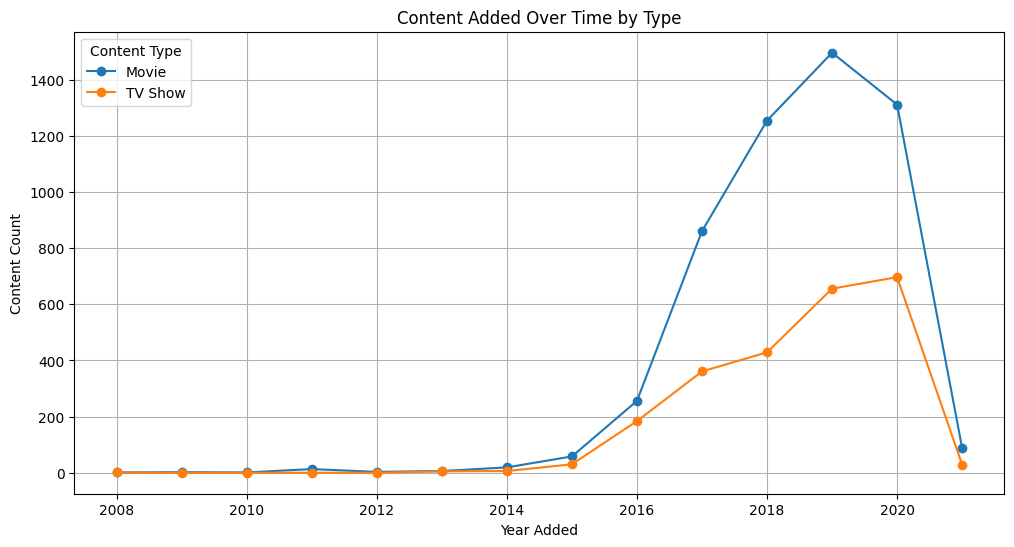

In [16]:
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(12,6))
content_over_time.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Content Added Over Time by Type')
plt.xlabel('Year Added')
plt.ylabel('Content Count')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** Content creation increased & peaked during 2019 year and then showed slight decline around 2020-2021.

Q.3. What are the most popular genres?

In [17]:
#Separate df created as genres: Split multiple entries by , separator and create separate row for each entry using explode
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

In [18]:
#genres

/tmp/ipython-input-3746192450.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_genres, x='count', y='genre', palette = 'coolwarm')


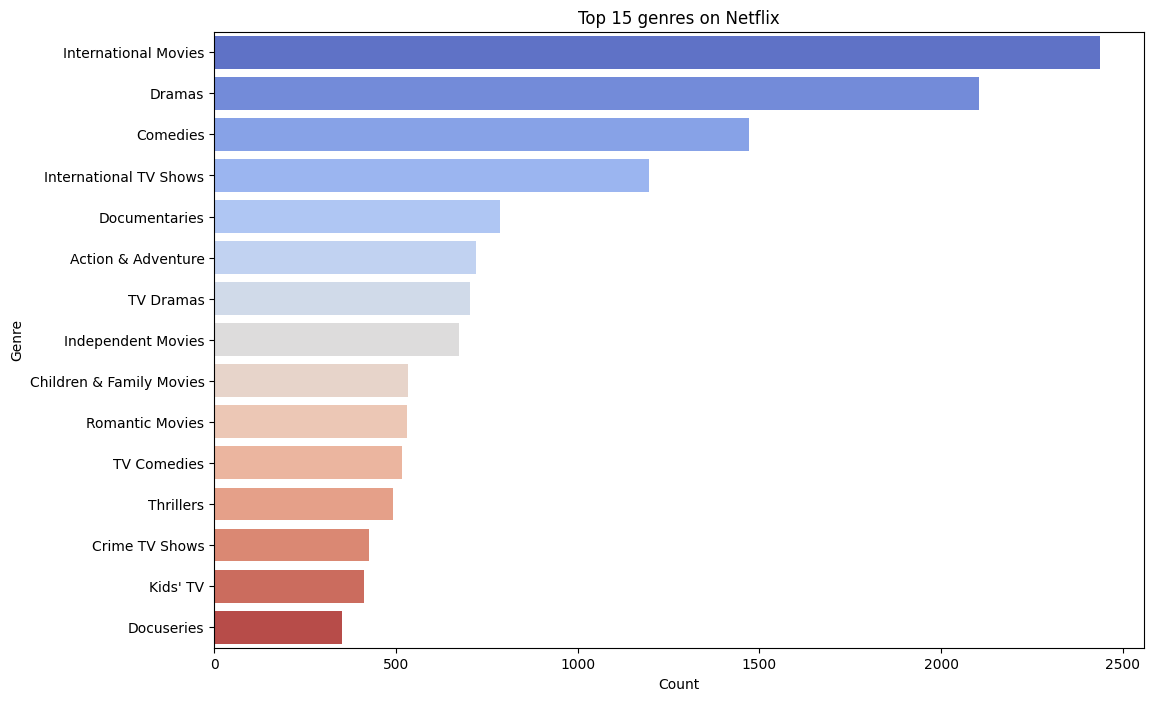

In [19]:
top_genres_counts = genres['genre'].value_counts().reset_index() #valuecounts used to get distribution per category
top_genres_counts.columns = ['genre', 'count'] #Renaming columns

#Top 15 genres
top_15_genres = top_genres_counts.head(15)

plt.figure(figsize=(12,8))
sns.barplot(data=top_15_genres, x='count', y='genre', palette = 'coolwarm')
plt.title('Top 15 genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insights:** International Movies is the most common genre

In [20]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8


Q.4. What is the distribution of content duration?

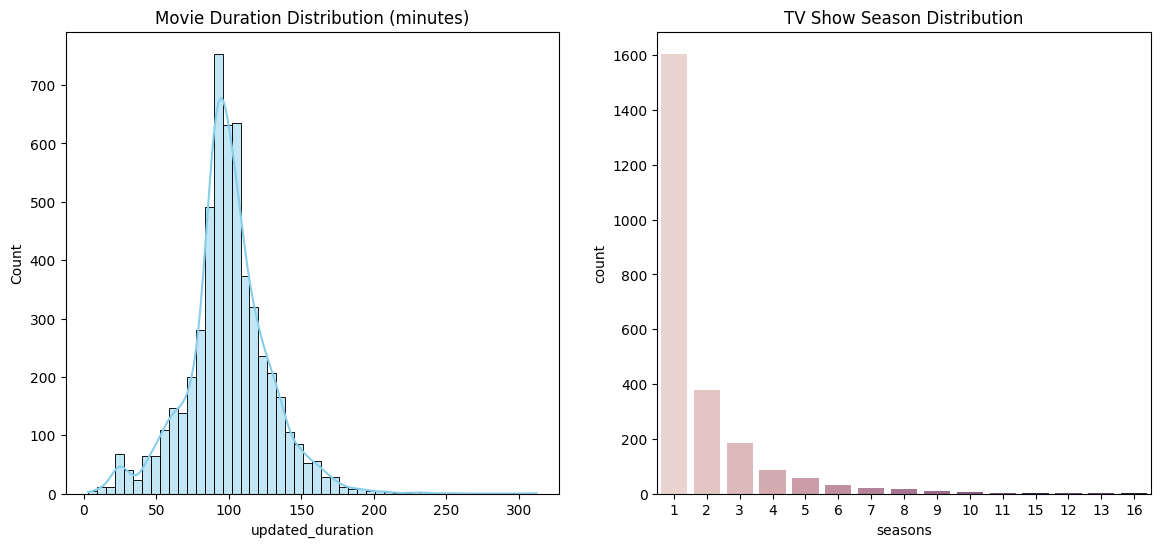

In [21]:
#Create df for different contents
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

#Clean the duration for movies
movies_df['updated_duration'] = movies_df['duration'].str.replace(' min', '').astype(int) #replace the min with null & convert it into integer data type
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

#Creating 2 plots using subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6)) #1 row & 2 columns

#Movie Duration distribution
sns.histplot(ax=axes[0], data=movies_df, x='updated_duration', kde=True, bins=50, color='skyblue').set_title('Movie Duration Distribution (minutes)')

#TV show duration distribution
sns.countplot(ax=axes[1], data=tv_shows_df, x='seasons', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

Q.5. Where does the content come from? (Geographical Analysis)

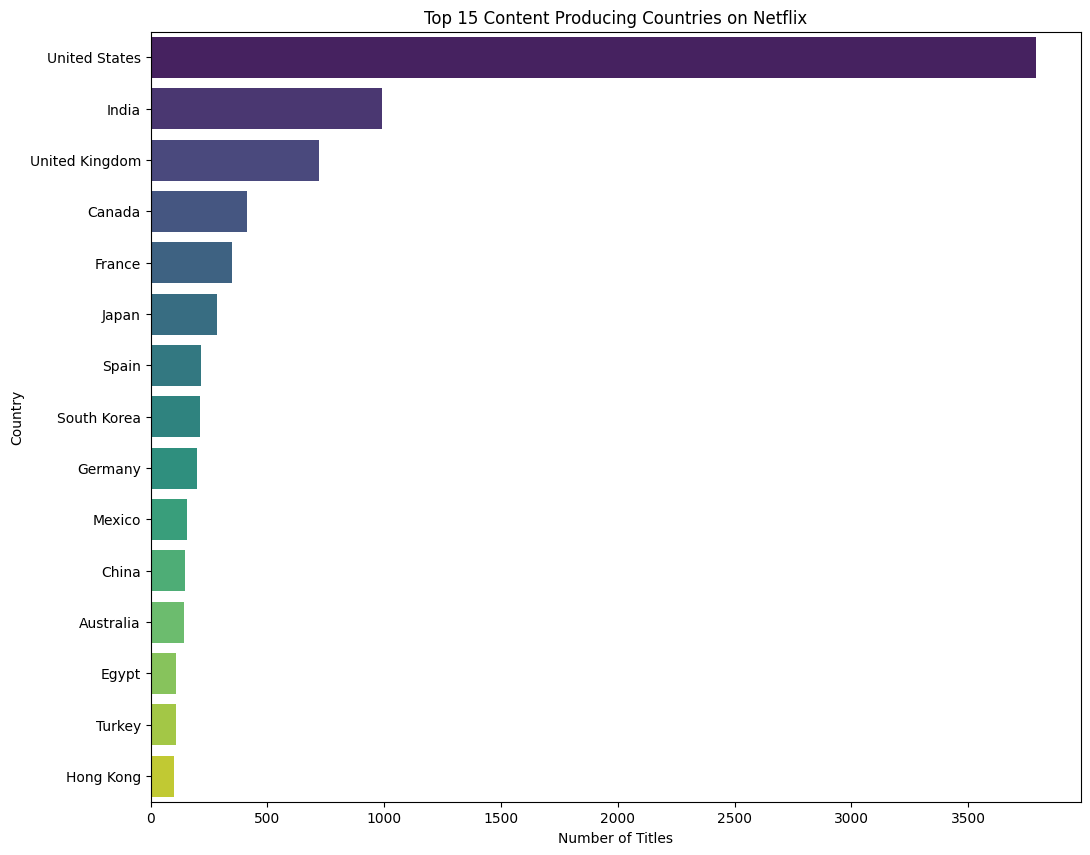

In [22]:
#Multiple entries
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

#top 15 countries
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix.

Q.6. What are the maturity ratings of the content?

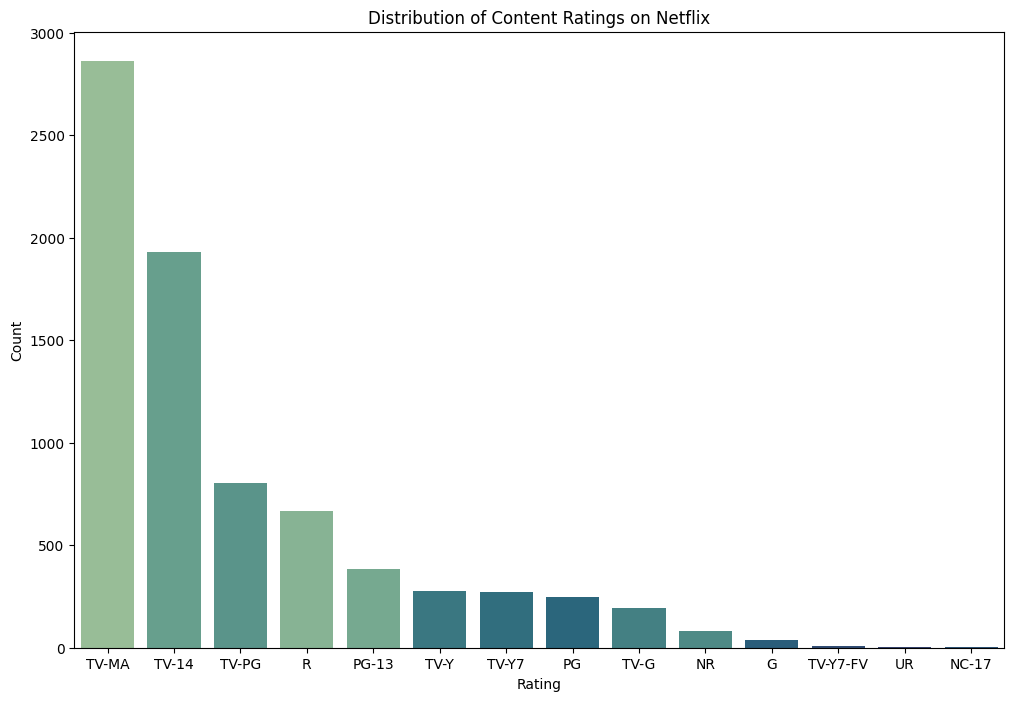

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings.

##Feature Engineering

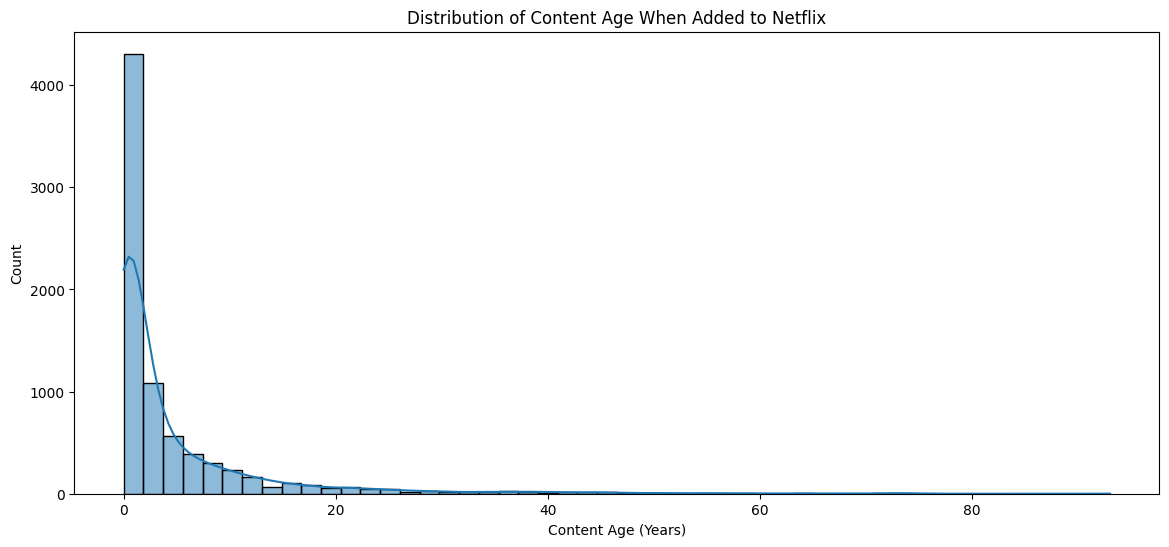

In [24]:
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 6))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Count')
plt.show()

**Insights:** Netflix is aiming for Originals over old shows & films.

##Multivariate Analysis

Analyse movie duration across different top genres

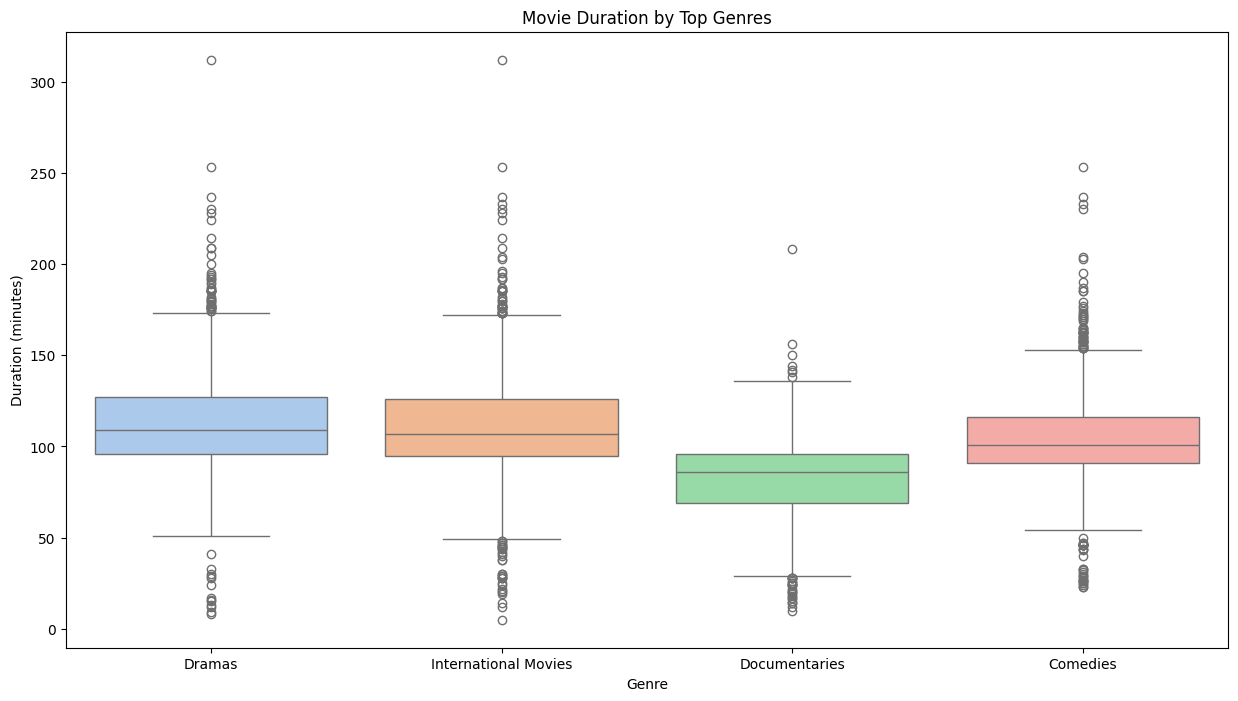

In [25]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. E.g., Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

##Word Cloud

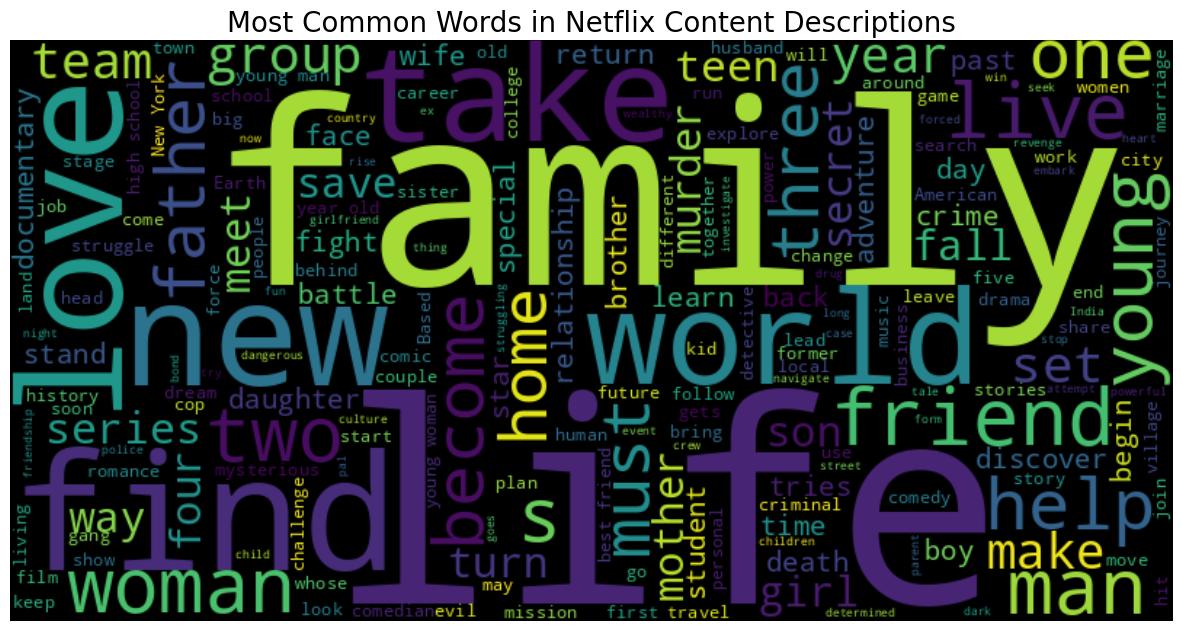

In [26]:
#Combine all descriptions into a single string using join
text = ' '.join(df['description'])

#Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insights:** Life, family, love, find, new, frient, young, father are few words which have been prominently seen across the NetFlix's description.

##Submission Questions

Q.1. How has the distribution of content ratings changed over time?

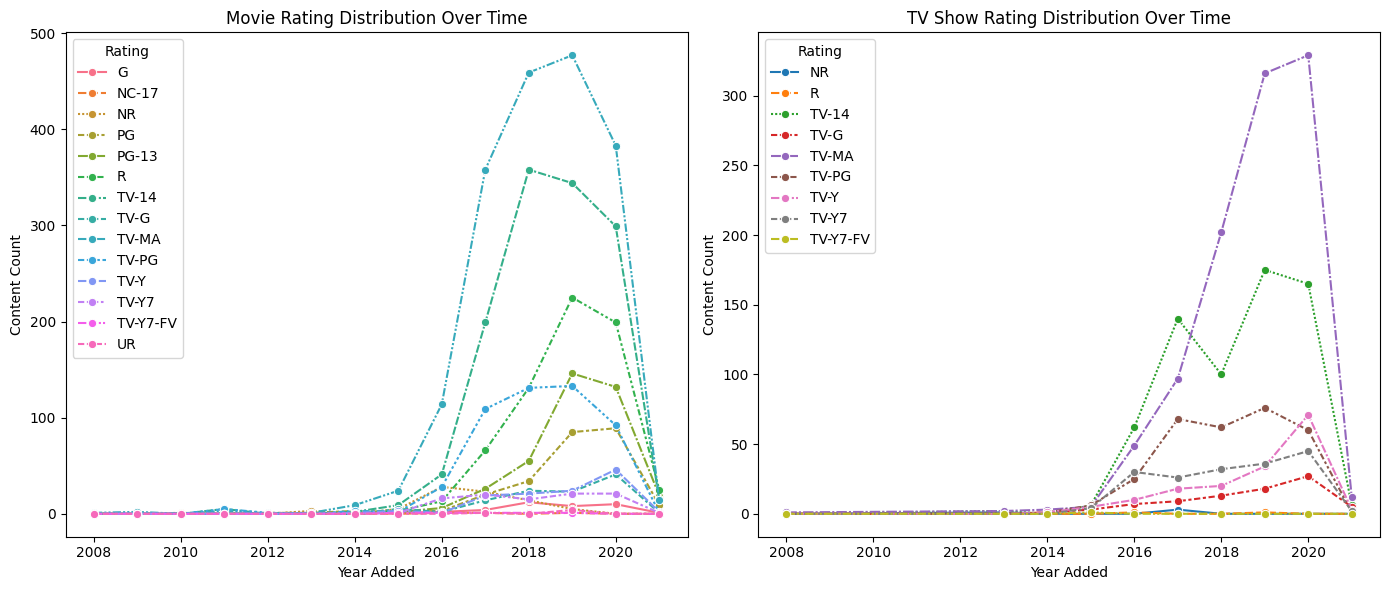

In [27]:
#Different dfs based on content
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

movie_ratings_over_time = movies_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)
tv_show_ratings_over_time = tv_shows_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

#Lineplot for visualizing over-time changes
fig, axes = plt.subplots(1, 2, figsize=(14,6))

#Movie Rating
sns.lineplot(ax=axes[0], data=movie_ratings_over_time, marker='o', color='skyblue').set_title('Movie Rating Distribution Over Time')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Content Count')
axes[0].legend(title='Rating')

#TV Show Rating
sns.lineplot(ax=axes[1], data=tv_show_ratings_over_time, marker='o', color='salmon').set_title('TV Show Rating Distribution Over Time')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Content Count')
axes[1].legend(title='Rating')

plt.tight_layout()
plt.show()

**Insights:** Huge growth of content was seen around 2016-2019, especially TV-MA and TV-14 for both Movies & TV shows. PG-13 & R ratings were also significant in Movies, while TV-14, TV-PG followed significance in TV shows.

Q.2. Is there a relationship between content age and its type (Movie vs. TV Show)?

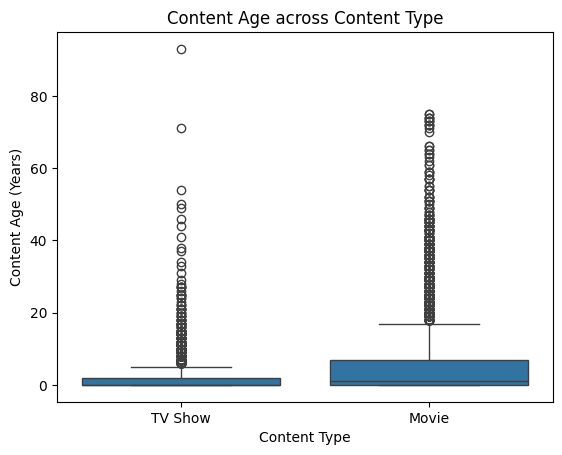

In [28]:
sns.boxplot(data=content_age, x="type", y="age_on_netflix").set_title('Content Age across Content Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.show()

**Insights:** Movies generally have a higher median content age than TV Shows, meaning that Netflix adds more older movies than shows & newer shows are mostly added.

Q.3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

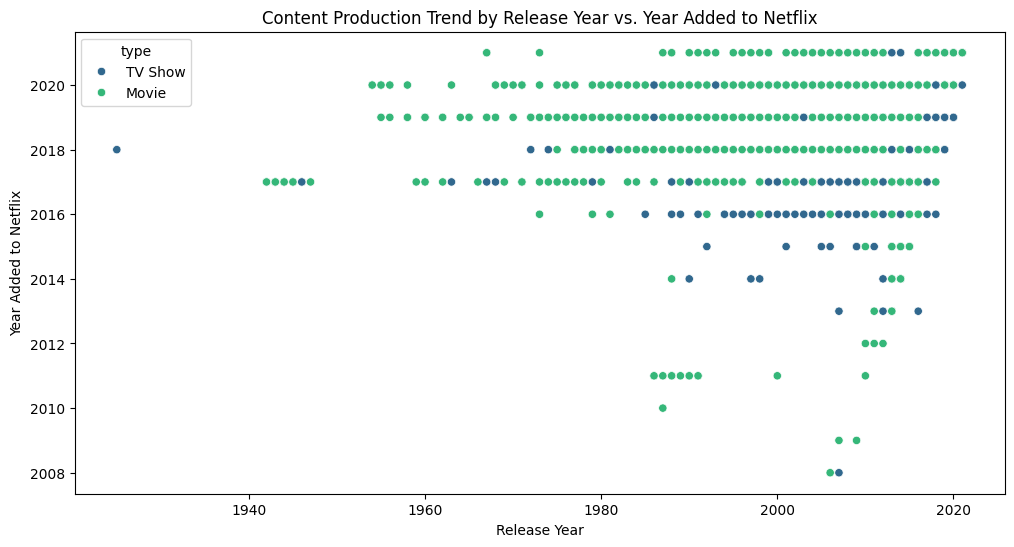

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='release_year', y='year_added', hue='type', palette='viridis')
plt.title('Content Production Trend by Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.show()

**Insights:** After approx 2016, the density of points increases, showing Netflix's rapid expansion.It also signifies more acquisition of older movies & some older tv shows arounf 2018 along with recently produced content.

Q.4. What are the most common word pairs or phrases in content descriptions?

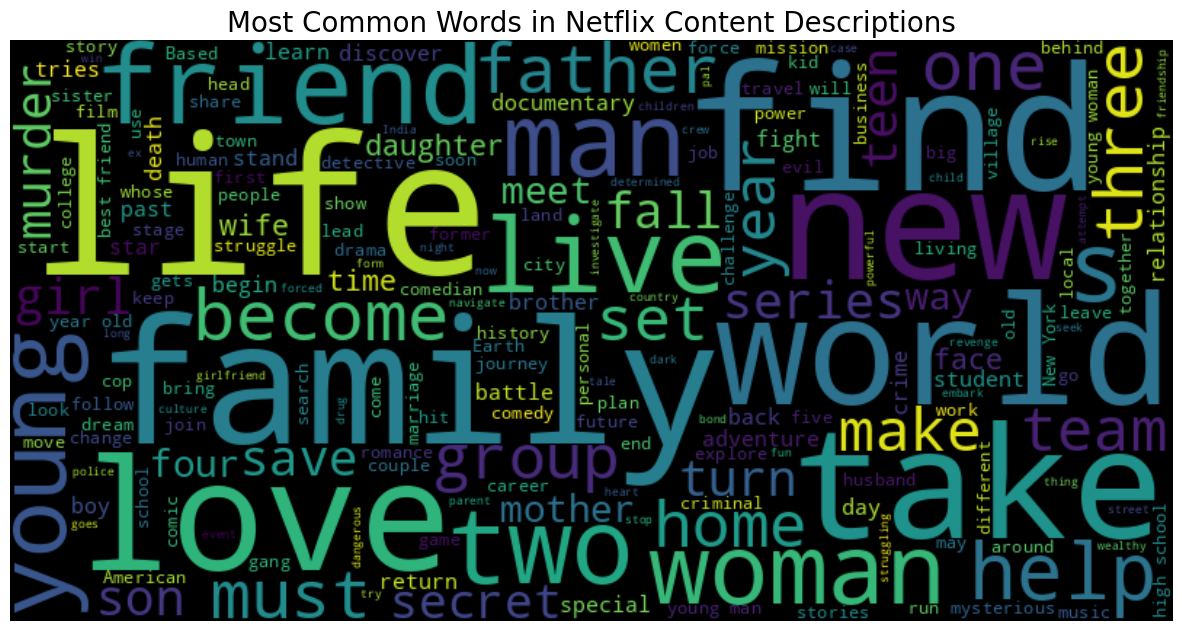

In [30]:
text = ' '.join(df['description'])

#Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insights:** World, family, love, life, father, young, friend are some of the common words seen the content descripton.

In [31]:
#df['director'].head(30)

Q.5. Who are the top directors on Netflix?

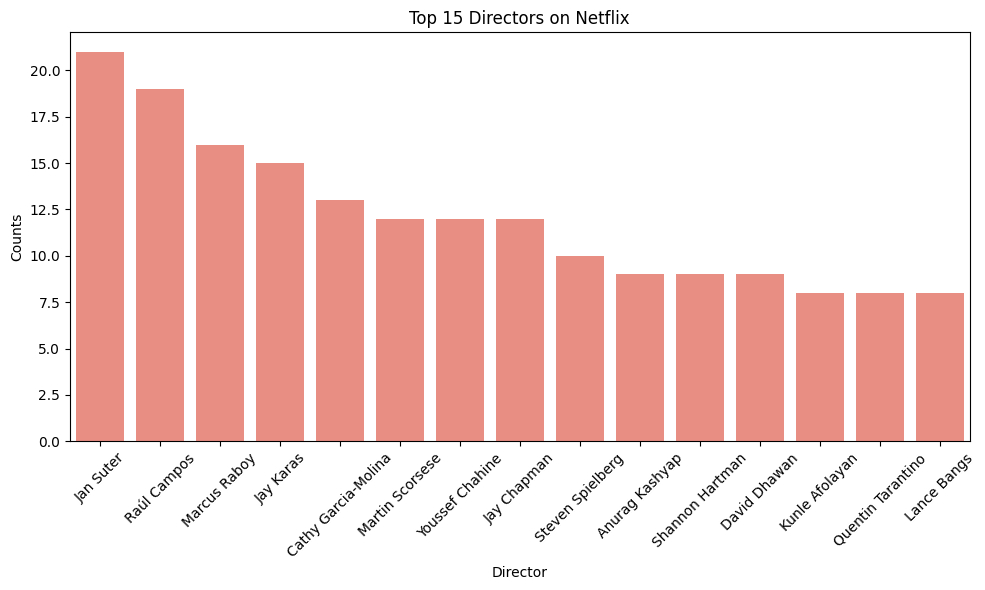

In [32]:
directors = df[df['director'] != 'Unknown'] #Removing Unknown values
directors = directors.assign(director=directors['director'].str.split(', ')).explode('director') #Multiple values

top_directors = directors['director'].value_counts().reset_index()
#print(top_directors)

top_directors.columns = ['director', 'count']
top_15_directors = top_directors.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_directors['director'], y=top_15_directors['count'], color='salmon').set_title('Top 15 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights:** Jan Suter, Raul Campos are the top 2 directors on netflix. The list also includes Indian directors like Anurag Kashyap and David Dhawan.